<a href="https://colab.research.google.com/github/ankurvarma7/neuralnetworks/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt

class Perceptron:
  def __init__(self, w=[1,1], b=-1):
    self.w=torch.tensor(w,dtype=torch.float32)
    self.b=torch.tensor(b,dtype=torch.float32)

  def sign(self, z):
    if z<0:
      return -1
    else:
      return 1

  def fit(self, X, Y, lr=0.25):
    count=0
    print(f"Weights before training {self.w}")
    print(f"Bias before training {self.b}")
    for x,y in zip(X,Y):
      xT = x.unsqueeze(0).T
      z = self.w@xT + self.b
      output=self.sign(z[0].item())

      self.w = self.w + lr * (y-output) * x
      self.b = self.b + lr * (y-output)
      count += 1
      print(f"Weights after training {count} datapoint {self.w}")
      print(f"Bias after training {count} datapoint {self.b}")

  def predict(self, X, Y):
    predicted = []
    for x,y in zip(X,Y):
      xT = x.unsqueeze(0).T
      z = self.w@xT+self.b

      output = self.sign(z[0].item())
      predicted.append(output)

    return torch.tensor(predicted)

  def evaluate(self,Y,ypred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for y,ycap in zip(Y,ypred):
      if y == 1 and y == ycap:
        tp += 1
      elif y == -1 and y == ycap:
        tn += 1
      elif y == 1:
        fn += 1
      else:
        fp += 1

    accuracy = (tp+tn)/ypred.numel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print(f"Precision : {precision}")
    print(f"Recall : {recall}")
    print(f"Accuracy : {accuracy}")

Xtrain = torch.tensor([[1,1],[-1,1],[-1,-1],[1,-1]],dtype=torch.float32)
Xtest = torch.tensor([[0.5,2],[2,2],[-0.5,0],[-0.5,-2]],dtype=torch.float32)
Ytrain = torch.tensor([-1,1,1,-1])
Ytest = torch.tensor([1,-1,1,-1])

perceptron=Perceptron()
perceptron.fit(Xtrain,Ytrain)

Weights before training tensor([1., 1.])
Bias before training -1.0
Weights after training 1 datapoint tensor([0.5000, 0.5000])
Bias after training 1 datapoint -1.5
Weights after training 2 datapoint tensor([0., 1.])
Bias after training 2 datapoint -1.0
Weights after training 3 datapoint tensor([-0.5000,  0.5000])
Bias after training 3 datapoint -0.5
Weights after training 4 datapoint tensor([-0.5000,  0.5000])
Bias after training 4 datapoint -0.5


In [2]:
ypred = perceptron.predict(Xtest,Ytest)

In [ ]:
print(ypred)

tensor([ 1, -1, -1, -1])


In [3]:
perceptron.evaluate(Ytest,ypred)

Precision : 1.0
Recall : 0.5
Accuracy : 0.75


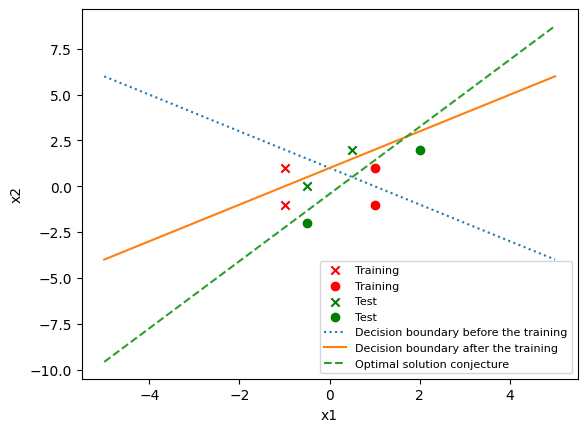

In [17]:
import numpy as np

def visualizeDataPoints(X,Y,color=None,data=None|str):
  marker={1:"x",-1:"o"}

  for label in marker.keys():
    x1=[]
    x2=[]
    for i in range(X.size(0)):
      if Y[i].item() == label:
        x1.append(X[i,0].item())
        x2.append(X[i,1].item())

    npx1=np.array(x1)
    npx2=np.array(x2)
    plt.xlabel(xlabel='x1')
    plt.ylabel(ylabel='x2')
    plt.scatter(npx1, npx2, marker=marker[label], c=color,label=data)

def visualizeDecisionBoundary(w,b,linestyle='dotted'):
  x = np.linspace(start=-5,stop=5,num=50)
  y = (w[0]*x + b) * (-1/w[1])
  y1 = -(x - 1)
  y2 = (-0.55*x + 0.125) * (-1/0.30)
  plt.plot(x,y1,linestyle='dotted',label='Decision boundary before the training')
  plt.plot(x,y,linestyle=linestyle,label='Decision boundary after the training')
  plt.plot(x,y2,linestyle='dashed',label='Optimal solution conjecture')
  plt.legend(fontsize=8)

visualizeDataPoints(Xtrain,Ytrain,'red',"Training")
visualizeDataPoints(Xtest,Ytest,'green',"Test")
visualizeDecisionBoundary(perceptron.w,perceptron.b,'solid')
